# Basics of Machine Learning - Part 2

<hr style="border:2px solid gray">

# Outline <a id='index'></a>
1. [Basics of Classification](#classification_basics)
1. [The MNIST Dataset](#MNIST)
1. [Confusion Matrix](#confusion)
1. [Other performance metrics for classification](#perf-metrics)
1. [The ROC Curve](#roc)
1. [Multiclass Classification and grid searches](#multiclass)

<hr style="border:2px solid gray">

# Basics of Classification [^](#index) <a name="classification_basics"></a> 

## Introduction to Classification

 In **classification** ML models, the model will make a prediction about how to **categorise a datapoint**. 
 
 
 We will start by looking at one of the most famous datasets in ML, a dataset that describes three different sorts of iris flowers (more information about this dataset can be found on [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)). This dataset is so famous that it is built into sklearn, and we can simply import it into to our notebook. 
 
Each sample has four features; sepal length, sepal width, petal length and petal width. The target/output is an integer from 0 to 2 corresponding to the three different types of iris. One drawback of the iris dataset is that it is not very large; it only contains 150 samples.

In [1]:
import numpy as np
import scipy as sp 
import pandas as pd
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns= iris.feature_names)
print(type(iris))
display(df) #Outputs iris in a nice format

<class 'sklearn.utils._bunch.Bunch'>


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
print(iris.keys()) #.keys() return the keys of the dictionary as a list

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [7]:
print(iris['DESCR']) #Description of dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

## Building the Model

We will start by building a very simple classification model. In the previous notebook, we discussed the k-NN algorithm for both regression and clasification, however we only used the model for a regression example. We can now try to use it for classification. 

As a quick reminder of the k-NN algorithm for regression, all we do to "train" the model is record the feature values and classes of the training points. Then, to make a prediction of the class of a new point, we say the class of the new point is the most common class among the $k$ nearest training points to the new point. 

How we define "nearest" depends on our choice of **distance metric**, but is most commonly the Euclidean distance:

\begin{equation*}
d(\mathbf{p},\mathbf{q})=\sqrt{\sum_{i=1}^{D}\left(q_{i}-p_{i}\right)^{2}},
\end{equation*}
where $\mathbf{p}$ and $\mathbf{q}$ are two points in our $D$-dimensional Euclidean space. Other distances can be chosen depending on the problem at hand. 

First, we want to make sure we split our data into training and test datasets.

In [8]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing portions
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.2, random_state = 3)  

In [9]:
print(y_train) # Sanity check that all is well (the outputs are between 0 to 2)

[0 0 2 1 0 0 1 0 2 1 2 1 0 0 2 1 0 1 2 1 0 0 2 1 1 0 2 0 2 1 0 0 2 1 0 0 1
 2 2 0 2 1 0 0 2 2 2 1 1 1 0 0 2 2 1 2 1 2 0 2 0 1 1 2 2 0 1 0 1 1 1 0 2 0
 2 1 2 1 2 1 0 2 1 2 1 0 1 2 0 1 0 0 0 1 2 0 0 2 0 1 2 1 2 2 1 1 2 1 0 1 1
 0 1 2 2 2 0 0 2 2]


It is always important to visualise your data, to look for obvious distinguishing traits (discriminators) or strong correlations. A pandas `scatter_matrix` is a good way to achieve this. 

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

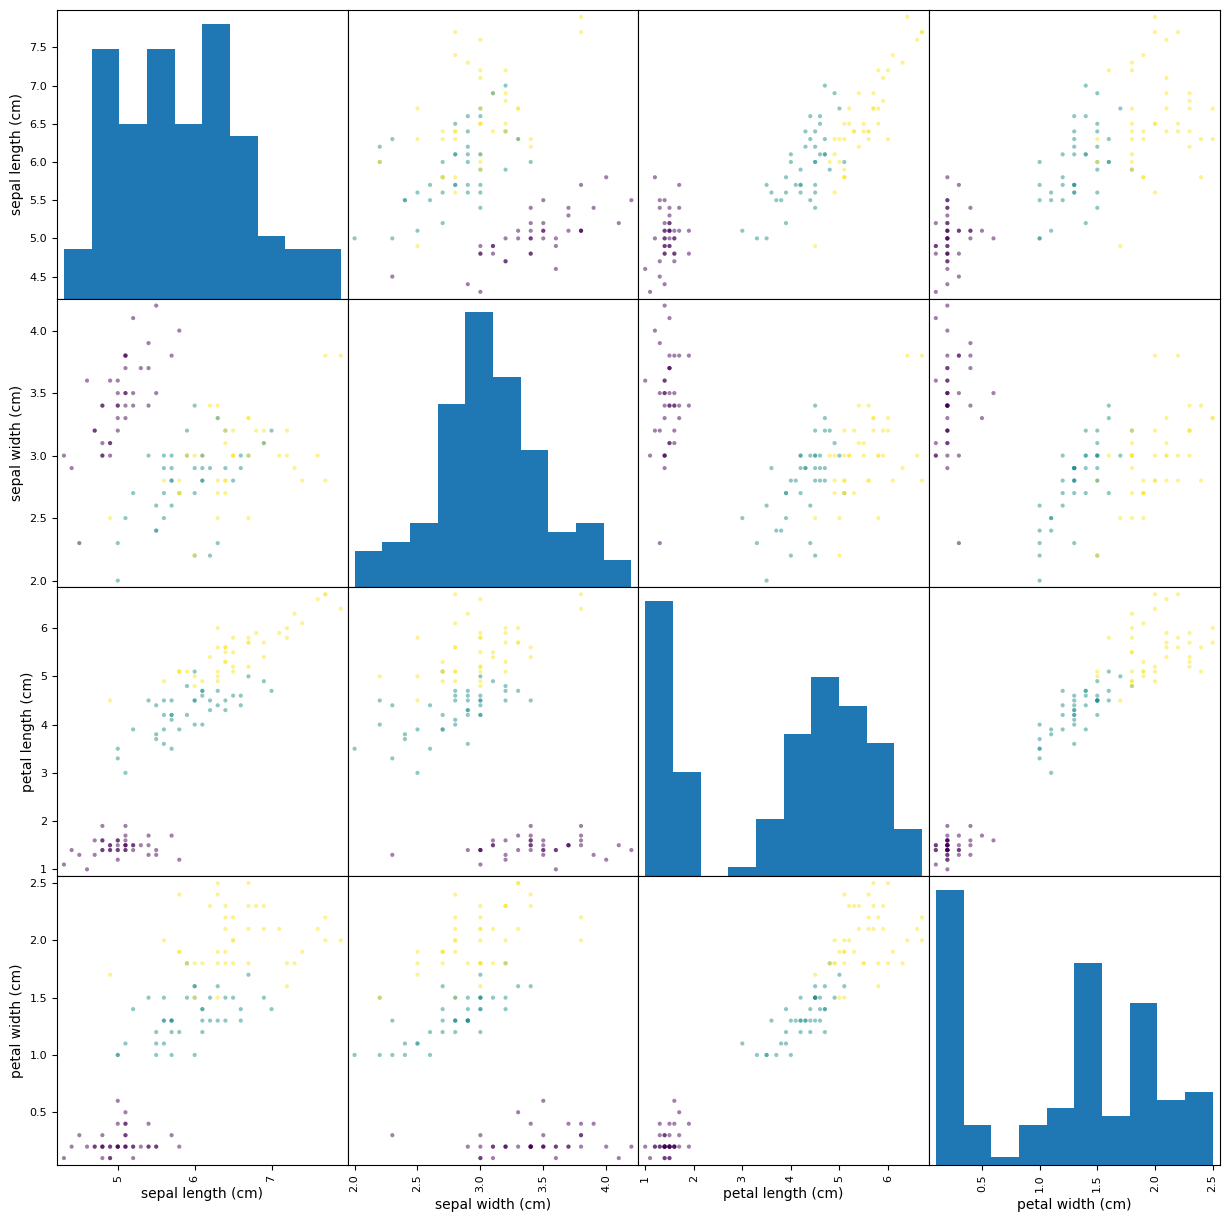

In [10]:
import pandas as pd

df_iris = pd.DataFrame(X_train, columns=iris.feature_names)
pd.plotting.scatter_matrix(df_iris, figsize=(15, 15), c=y_train)

The plots on the top-left to bottom-right diagonal are the histograms of the individual features, where the x-axis is the feature value and the y-axis is the frequency. The other plots show scatter plots of different pairs of features, so you can see how different features might correlate. The colour of the scatter points denotes which type of iris each point corresponds to. 

## Training the Model

The plots in the scatter matrix suggest it may be possible to seperate the data. We will now call `sklearn`'s k-NN classifier function and train our model.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = 5
weights = "uniform" 
iris_knn = KNeighborsClassifier(n_neighbors=neighbors, weights=weights)

In [12]:
iris_knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


## Making Predictions

We can now calculate the accuracy of our model using the test dataset.

In [13]:
pred = iris_knn.predict(X_test)

In [14]:
agree = 0
disagree = 0

for i in range(len(pred)): 
    # If the prediction matches the outcome, add one to the agree count
    if pred[i] == y_test[i]: 
        agree = agree +1
        
    else:
        disagree = disagree +1

print("Agreeing ", agree)
print("Disagreeing ", disagree)
print("Success fraction", agree/(agree+disagree))

Agreeing  29
Disagreeing  1
Success fraction 0.9666666666666667


We have two main hyperparameters we have used here: `n_neighbors`, and `weights`. These correspond to:

* `n_neighbors`: the number of nearest neighbours we consider, i.e. the value of $k$
<br>

* `weights`: whether we want to weight different training points differently. Default value is `uniform`, i.e. all of the $k$ points contribute equally to the prediction. One alternative is `distance`, which weights training points closer to the test point higher when making prediction. Read more details in the `sklearn` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

<div style="background-color: #000000">

### Exercise

Investigate how different hyperparameters (such as number of neighbours, weighting etc) affect the performance of the k-NN classifier. Create a scatter plot of different hyperparameters against classification accuracy on test data to show your results. Try any other plots you think of that might present your results in a clear and interesting way.

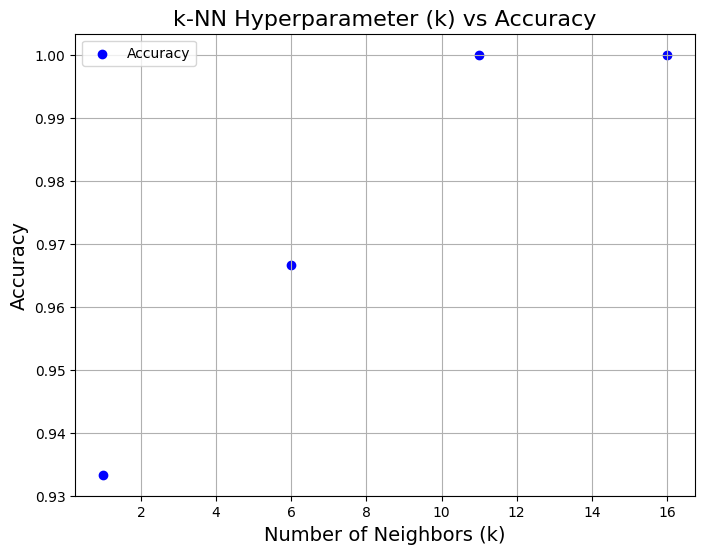

In [19]:
# Your code here
from sklearn.neighbors import KNeighborsClassifier

def helper(pred):
    agree = 0
    disagree = 0

    for i in range(len(pred)): 
        # If the prediction matches the outcome, add one to the agree count
        if pred[i] == y_test[i]: 
            agree = agree +1
            
        else:
            disagree = disagree +1
    return agree/(agree+disagree)


neighbor_acc = {}
for i in range(1,20,5):
    temp_knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    temp_knn.fit(X_train, y_train)
    pred = temp_knn.predict(X_test)
    accuracy = helper(pred)
    neighbor_acc[i] = accuracy


import matplotlib.pyplot as plt

# Scatter plot of k (n_neighbors) vs accuracy
plt.figure(figsize=(8, 6))
plt.scatter(neighbor_acc.keys(), neighbor_acc.values(), color='blue', label='Accuracy')

# Add labels and title
plt.xlabel('Number of Neighbors (k)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('k-NN Hyperparameter (k) vs Accuracy', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()


### Binary Classifiers

Our main focus for the rest of this notebook will be **binary classifiers** - classifiers that sort instances as either belonging to one particular group or not. These types of classifiers have historically been the most important, and can make key concepts easier to understand. 

If we wanted to seperate our data into more than two categories, we could use binary classification to split each of the two binary groups into further subgroups, repeating this process until the number of desired groups is achieved. 

We will also talk about so-called **multiclass classifiers**, which can take several different approaches towards separating into more than two groups, towards the end of this notebook.

<hr style="border:2px solid gray">
<a name="section-2"></a>

# The MNIST Dataset [^](#index) <a name="MNIST"></a>

The MNIST dataset is probably the most famous dataset in machine learning (see [Wikipedia](https://en.wikipedia.org/wiki/MNIST_database) for more information), and can be used to teach ML models how to read handwritten number. It contains 70,000 of images of handwritten numbers, with each image labelled with the actual number. The numbers are drawn on a 28 x 28 pixel grid.

In this section, we will attempt to train our own number classifier. First we must read in the data:

_Note: This dataset is far larger than the iris dataset and thus will be read in slower._




In [20]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [21]:
feature_count = 28 * 28 # these are 28 x 28 pixel images, so we should have this many features
print (feature_count)

784


In [22]:
X, y = mnist["data"], mnist["target"]
print(X.shape) # Print the shape just to check in comparison with what we expect; expect 784 features
y = y.astype(np.uint8) #Just setting the file type as unsigned integers for later

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

(70000, 784)


In [23]:
y.shape

(70000,)

To see what an example training point looks like, we will plot one arbitrary digit from the dataset.

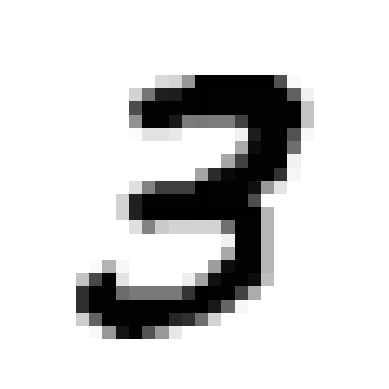

3


In [24]:
some_digit = X[7] #Just to pick an arbitrary figure. Try a different one
some_digit_image = some_digit.reshape(28, 28) #Reshapes the pixels into 28x28 format
plt.imshow(some_digit_image, cmap=mpl.cm.binary) #cmap is the colour map which spans between 0-100 
plt.axis("off")

plt.show()

print (y[7]) #Checking the label 

You should see the printed label matches the 28 x 28 pixel image.

We will now write a couple of functions to help display the images.<br><br>


<div style="background-color: #000000">
    
 Below, we define the argument `interpolation`. This is because we are resizing the images when we display them (so they are much larger than the original 28 x 28). However, we must fill in the information for any extra pixels by the transformation. More information and examples can be found [here](https://www.cambridgeincolour.com/tutorials/image-interpolation.htm) . `nearest` creates the information for these extra pixels by averaging the values of the pixels around it.

In [25]:
def plot_digit(data, ax):
    image = data.reshape(28, 28)
    ax.imshow(image, cmap = mpl.cm.binary, interpolation="nearest")     
    ax.axis("off")

In [26]:
def plot_digits(instances, images_per_row=10):
    
    num_inst = len(instances)
    
    # The ceiling function is similar to the floor function 
    # except that it rounds up to an integer rather than down
    n_rows = int(np.ceil(num_inst/images_per_row))
    
    plt.figure(figsize=(9, 9))
    plt.axis("off")
    
    for num, digit in enumerate(instances):
        
        ax = plt.subplot(n_rows , images_per_row, num+1)
        plot_digit(digit, ax)      

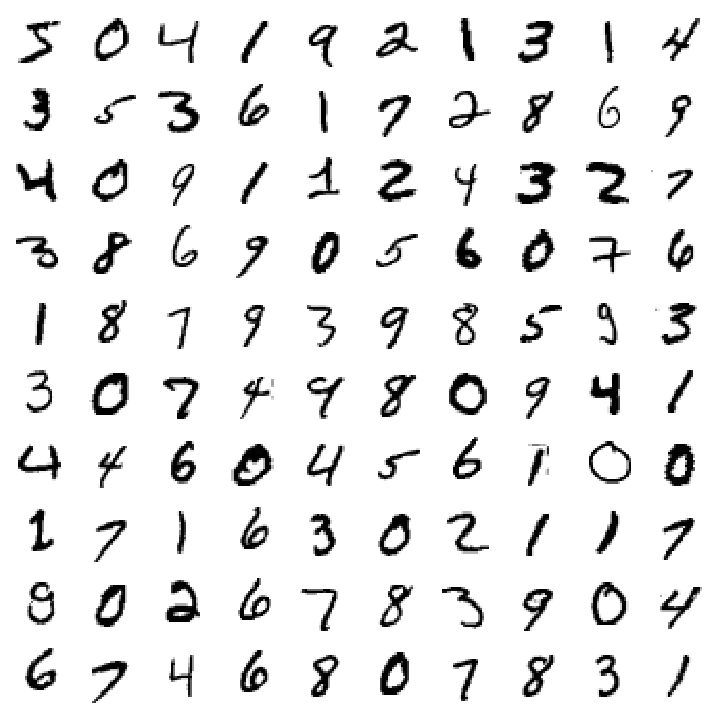

In [27]:
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
plt.show()

### Binary Classifier

Although our data contains 10 obvious categories (the digits 0-9), we can redefine our problem to be one of **binary** classification by simply having two groups - **group 5** and **not group 5** (or any other integer). We must create new labels for our dataset that separates the instances by these two groups:



In [28]:
y_train_5 = (y_train == 5) #True if it was 5, otherwise false
y_test_5 = (y_test == 5)

print (y_train_5)

[ True False False ...  True False False]


There are many binary classifiers that you could use here, and you will learn about two very common ones in the next sessions. Here we will use sklearn's **Stochastic Gradient Descent (SGD) Classifier** (details for gradient descent are available in Appendix B/C in ML Basic 1). This is typically good for large datasets. 

This method fits a linear model to the data, to minimise a loss function of the data and the model predictions. There are many loss functions in general, and we will discuss these generally in more detail when we come to discuss neural networks, but in sklearn the default loss function for `SGDClassifier` is the so-called **hinge loss**. For a classifier score $y$ and target class $t = \pm 1$, this is given as

$$\text{hinge}(y) = \text{max}(0, 1-t\cdot y)$$

This is equivalent to the so-called soft margin condition in **support vector machines**, which we will discuss in an upcoming session. 

In [29]:
from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42) 

#max_iter is the number of passes/epochs over the training data
#tol is the stopping criterion. Convergence or tolerance for error for consecutive epochs
#random_state Shuffles data, where you pass an integer for repoducible results

sgd_clf.fit(X_train, y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [30]:
print(sgd_clf.predict([some_digit])) #Remember we set this to X[7] earlier (which was 3)
print(sgd_clf.predict([X[0]])) #However X[0] was 5

[False]
[ True]


## Performance

To examine the performance of our model, we could have a look at the model's accuracy in predicting the test set. However, it is preferrable to keep that dataset "clean" so that we can use it for final evaluation at the end.

An alternative way to measure perrformance is with **Cross Validation**. 

_As a reminder from ML 1, in cross-validation we take $N$-folds from the training set. We use all but one fold as training data and the remaining fold is used as the test data. This process repeats $N$ times, i.e. until each fold has acted as the test set once._

In [31]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy") #This has 3 folds

array([0.95035, 0.96035, 0.9604 ])

This achieves an accuracy rating of $\approx$ 95%, which at first seems like an excellent performance. However, only 1 in 10 data entries have the value 5. This means that if our model classified every data point as not five, it would still be $\approx$ 90% accurate. 

Clearly, when we are dealing with a classification problem, we need to not only have a good classification accuracy, but think what kind of accuracy we would expect if we just assigned class labels randomly or assigned only one label to all data.

<hr style="border:2px solid gray">

## Confusion Matrix [^](#index) <a name='confusion'></a>

We often refer to the number of instances belonging to the set as the **condition positive, P**, and the number of instances not in the set as the **condition negative, N**. 

A much more insightful way of examining our model's performance would be to look at how often an image with true class 5 was:
* incorrectly classified as not a 5 (**false negative, FN**),
* correctly classified as a 5 (**true positive - TP**),

or a non-5 was:
* incorrectly classified as a 5 (**false positive, FP**),
* correctly classified as not a 5 (**true negative, TN**).

We are still trying to keep our actual test data "clean" and so we will use cross-validation again. This time we will call `cross_val_predict` instead of `cross_val_score`. This function tells us whether each point was classified correctly when included as a test sample, in a standard cross validation approach.

In [32]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [33]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

The top row of this matrix is about the non-5s. It shows that there were 53,892 TNs and 687 FPs. The second row is about actual 5s. It shows that there were 1,891 FN (i.e. not idientified as 5) and 3,530 TP.

We can fake what a perfect prediction would look like:

In [34]:
y_train_perfect_predictions = y_train_5 #Setting the predictions to the values themselves
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

<div style="background-color: #000000">

### Exercise

Try using kNN classification on this dataset to identify whether an MNIST digit is 5 or not, for different values of k. Evaluate the cross-validation accuracy and find the confusion matrix for each model you try. How does it compare to the SGD result we saw above?

In [ ]:
# Your code here


<hr style="border:2px solid gray">

# Other performance metrics for classification [^](#index) <a name='perf-metrics'></a>

When we consider classification, there are in fact several different ways we can quantify how good our models are, beyond just accuracy or counting the number of correctly identified data points. We will talk about some of these here.

## Precision and Recall

The information contained in the confusion matrix can sometimes be better expressed and understood with two fractions: 

1. What fraction of those identified as 5 really are 5. This is called **precision** (sometimes, especially in particle physics, **purity**):

$$ \text{Precision} =\dfrac{TP}{TP+FP} = \dfrac{TP}{\text{Total predicted as belonging to set}} $$

2. What fraction of the true 5s did the model identify. This is called **recall** (sometimes, especially in particle physics, **efficiency**):

$$ \text{Recall} = \dfrac{TP}{TP+FN} = \dfrac{TP}{\text{P}} $$

Sklearn can compute these for you:

In [35]:
from sklearn.metrics import precision_score, recall_score

print(round(precision_score(y_train_5, y_train_pred), 2))

print(round(recall_score(y_train_5, y_train_pred), 2))

0.84
0.65


## Precision-recall tradeoff

When building an ML model, we will sometimes have to make a choice between optimising recall or optimising precision. These decisions often take place under the hood of our model.

The SGDClassifier calculates a score for each data instance. The model's classification of that instance depends on whether that score is above or below some **threshold** value. Changing that threshold would change the precision and recall for this classifier. 

Sklearn does not let you alter the threshold directly, but it does give you access to the **decision score**. You can do this by calling `decision_function` rather than `predict`.

<div style="background-color: #000000">

**Note**: not all classifiers in scikit-learn have a `decision_function` method, e.g. for k-NN; instead, you will need to use `predict_proba`. See the `roc_curve` [User Guide](https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics) for more details.



We can then use these values to make our own threshold:

In [36]:
y_scores = sgd_clf.decision_function([some_digit]) #Examining our test digit from before
y_scores

array([-4988.52407755])

In [37]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[False]


How to we decide where we want the threshold? The first step is to look at the decision scores. We start by using cross validation with the decision function:

In [38]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [39]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

We can then visualise how the precision and recall values change with the threshold. In red, we will also show the values of the threshold and recall when the precision in 0.9.

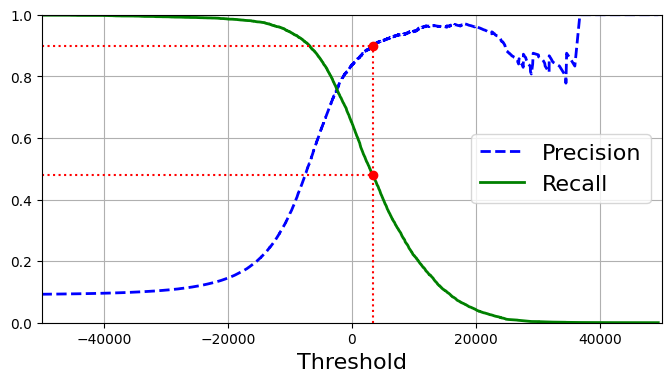

In [40]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-50000, 50000, 0, 1])             


threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:") 

plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")

plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")   

plt.show()

The precision curve is much less smooth than the recall curve. If we increase the threshold, we will categorise fewer values as being 5s. Both the number of true positives and false positives will decrease, but the total number of instances will not change. 

This means that recall (which depends on only the true positive count and some constant) will uniformly decrease. We can see that precision should increase in general, but not necessarily uniformly.


By default, SGDClassifer has set the threshold value as 0. The cell below verifies this claim.

In [41]:
(y_train_pred == (y_scores > 0)).all()

np.True_

We can also demonstrate the tradeoff of recall and precision by plotting the two values against each other. Again, the point on the graph where precision is 0.9 is highlighted.

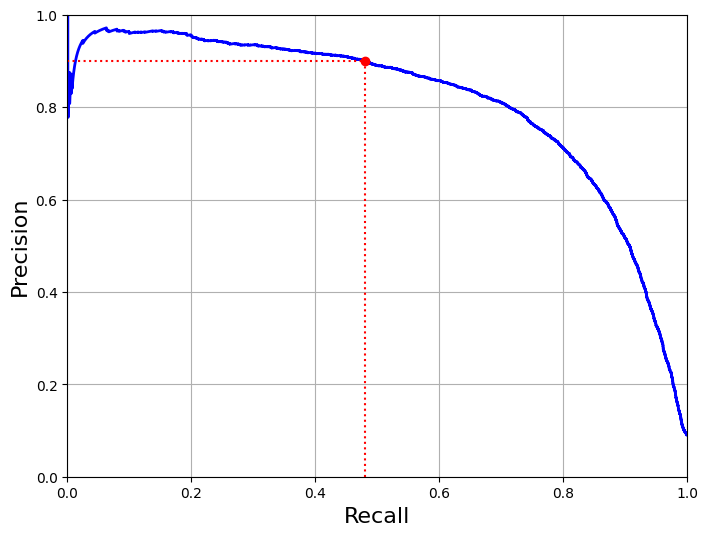

In [42]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")

plt.show()

<hr style="border:2px solid gray">

# The ROC Curve [^](#index) <a name="roc"></a>

Another very common way of viewing performance is the *Receiver Operating Characteristic*  (ROC) curve. The ROC curve plots the True Positive Rate against the False Positive Rate. 

The True Positive Rate (TPR) is the fraction of instances belonging to one class that are correctly identified as that class - it is the same as the recall: $TPR = \frac{TP}{P}$

The False Positive Rate (FPR) is also referred to as 'the probability of false alarms' or as the **fall-out** i.e. the fraction of instances not in a given class incorrectly predicted as belonging to that class: $FPR = \frac{FP}{N}$

Sklearn can calculate these rates for us using `roc_curve`. 

In [43]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

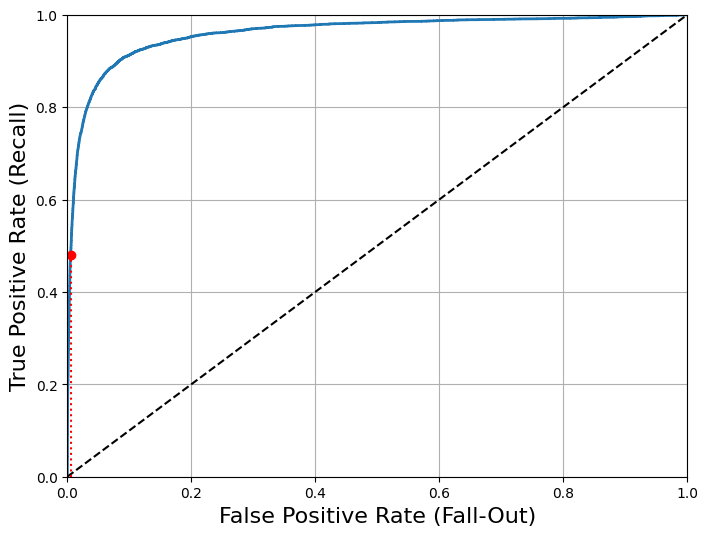

In [44]:
def plot_roc_curve(fpr, tpr, label=None):
    
    plt.plot(fpr, tpr, linewidth=2, label=label)
    
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal line in black
    
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

    
plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr)

#We will indicate on the graph where the precision of the model is 0.9 
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  
plt.plot([fpr_90], [recall_90_precision], "ro")               
                                  
plt.show()

Below is an annotated example of an ROC curve. 

* If we randomly classify samples, we should see a ROC curve with a straight line with gradient 1, i.e. the diagonal dashed line
* The best possible classifier has a fall-out equal to 0 and a recall equal to 1
* The worst possible classifier has a fall-out of 1 and a recall of 0

Models with a ROC curve above the diagonal are doing better than random selection. The closer the ROC curve resembles a step function, the better the performance of the model.

<img src='imgs_basic/roc_curve_schematic_.png' width=600 align='center'/>

*Schematic of a receiver operator characteristic (ROC) curve. The diagonal dashed line indicates the performance of a random classifier. Better classifiers are closer to the top left of the plot, and worse classifiers are closer to the bottom right.* 


## Area under ROC Curve

One way to compare the performance of different classifiers is to compare the *Area Under ROC Curve* (AUC). The closer this is to 1, the better our trained model should perform. 

We can calculate this value for our classifier:

In [45]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

This is close to 1, so this model is pretty good overall. 

<div style="background-color: #0000">

### Exercise

Revisit your kNN models for MNIST from the previous exercise and find the ROC curve and ROC-AUC score for each of them. How do they compare to the SGD classifier? 

Note: You will need to use `predict_proba` for kNN, as mentioned before. See [the documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics).

In [ ]:
# Your code here

<hr style="border:2px solid gray">

# Brief Introduction to Multiclass Classification [^](#index) <a name="multiclass"></a>

You have seen one multiclass classifier today and you will see two more in the upcoming sessions. For now, we will experiment with trying to build a multiclass classifier out of binary classifiers. 



<div style="background-color: #0000">

###  Exercise

We will use the MNIST dataset to try making our own multiclass classifier. So far we have trained kNN and SGD classifiers to discriminate if a data point is a 5 or not. 

First, you should train a separate kNN or SGD classifier (your choice) for each MNIST class, i.e. you should have a classifier to classify if a point is a 0 or not, a 1 or not, a 2 or not etc. Use the same hyperparameters as earlier, unless you have time to tune each classifier individually. 

Remember to use the same training set for all of your models, but make sure you set up the labels correctly. You can use the earlier code for setting up the 5 or not problem as a guide, or you could use `LabelBinarizer` from the sklearn preprocessing module (see [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html) for details).

In [ ]:
# Your code here

<div style="background-color: #0000">

Now we have a classifier trained for each class, we will put them together into a so-called "one-vs-rest" multiclass classifier, i.e. each inidividual classifier is a binary classifier of one class or the rest. 

You should find the score from each classifier for the test dataset i.e. the output of `decision_function` (or `predict_proba` for kNN, as mentioned in the precision-recall tradeoff section earlier). Then, find the highest score for each data point and get the class that corresponds to, i.e. if model 5 had the highest score for a given datapoint then you would return class 5. 

Find the final classification accuracy you get, and find the confusion matrix. How good is your result, and how would it compare to picking a class randomly? Compare this to our earlier comments on the 5/not-5 model.

In [ ]:
# Your code here

In fact, for the majority of algorithms sklearn will automatically train a set of one-vs-rest classifiers if you pass training data with more than two classes, including `KNeighborsClassifier`. You can also do this manually using `OneVsRestClassifier`, along with other multiclass methods. You can read about what algorithms have this behaviour, and about doing it yourself with the `sklearn.multiclass` module, in [the documentation](https://scikit-learn.org/stable/modules/multiclass.html#multiclass-and-multioutput-algorithms).

We will now try using multiclass kNN for the iris dataset . We want to make our model as accurate as possible and thus it is important to choose the optimal hyperparameters. To do this, we will perform a **grid search**.

<div style="background-color: #0000">
    
## Grid Search
    
To use `sklearn`'s grid search, you first create a list containing all the hyperparameters and theie values you wish to search over (the 'grid'). `GridSearchCV` will then evaluate over all possible combinations of these values, and use cross-validation to evaluate them.
    
Grid search is not limited to finding these 'training' hyperparameters. We can also use a grid search to evaluate whether or not to include particular features, the best way to handle outliers etc.
    
An alternative to grid search is a **randomised search**, where random values for each hyperparameter are used, rather than a more systematic (but slower) approach.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'],iris['target'], test_size=0.25)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=1)
# Verbose refers to how much information about the current state of training you want the function to print
# Try changing this to 2 to compare

grid_search.fit(X_train, y_train) # Here we have trained with 3 possible classes to create a multiclass classifier

In [ ]:
# Returns the ideal parameters from the grid search
grid_search.best_params_

We can find the best cross-validation accuracy achieved in the grid search, by accessing `best_score_`:

In [ ]:
grid_search.best_score_

After running the grid search, the `GridSearchCV` object behaves as a trained classifier with the hyperparameter values that gave the best cross-validation score.

Finally, we want to see how our best parameter choice (according to `GridSearchCV`) performs on the test data:

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

<div style="background-color: #0000">

### Exercise

Use `KNeighborsClassifier` and `SGDClassifier` as multiclass classifiers to identify all the digits in the MNIST, trying to achieve the greatest accuracy possible. Compare the performance of your best models for each. Which does better?
    
This will require a lot of parameter setting and computing time. You will need to do a **grid scan** to find the optimal parameters.
    
Use the logic from the iris dataset example to guide you. 

Also, use some of the performance metrics mentioned in the previous section - note that finding ROC curves and computing ROC-AUC scores is not so simple for multiclass, see [the documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics) for more details.


    
</div>


In [ ]:
# Your code here

